Dataset link - https://github.com/SwarnaDharshiniS/MScFE-600FD-GWP1/blob/main/task4dataset.csv

In [8]:
# ---------- Task 4: Empirical Analysis of ETF Holdings (NIFTYBEES Top-30) ----------
# Requirements: pip install pandas numpy matplotlib seaborn scikit-learn yfinance

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, yfinance as yf, os
from sklearn.decomposition import PCA

os.makedirs("task4_outputs", exist_ok=True)
plt.style.use('seaborn-v0_8-darkgrid')
# ----- a) Top-30 NSE tickers -----
tickers = [
    "RELIANCE.NS","HDFCBANK.NS","BHARTIARTL.NS","TCS.NS","ICICIBANK.NS","SBIN.NS",
    "BAJFINANCE.NS","INFY.NS","HINDUNILVR.NS","LT.NS","ITC.NS","MARUTI.NS","M&M.NS",
    "KOTAKBANK.NS","SUNPHARMA.NS","HCLTECH.NS","AXISBANK.NS","ULTRACEMCO.NS","NTPC.NS",
    "BAJAJFINSV.NS","ONGC.NS","ADANIPORTS.NS","TITAN.NS","BEL.NS",
    "ADANIENT.NS","JSWSTEEL.NS","POWERGRID.NS","TATAMOTORS.NS","WIPRO.NS","PNB.NS"
]

In [9]:
# ----- b) Download data for past ~6 months -----
end = pd.Timestamp.today().normalize()
start = end - pd.Timedelta(days=190)
print(f"Downloading price data {start.date()} to {end.date()} for {len(tickers)} tickers...")
data = yf.download(tickers, start=start.strftime("%Y-%m-%d"), end=end.strftime("%Y-%m-%d"), progress=True, threads=True)

# Extract adjusted close prices
if isinstance(data.columns, pd.MultiIndex):
    adj = data['Adj Close'] if 'Adj Close' in data.columns.levels[1] else data['Close']
else:
    adj = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']

adj = adj.dropna(axis=1, how='all')
print("Adjusted close data shape:", adj.shape)
print(adj.head(), "\n")
adj.to_csv("task4_outputs/adjclose_top30.csv")

/tmp/ipython-input-952352899.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start.strftime("%Y-%m-%d"), end=end.strftime("%Y-%m-%d"), progress=True, threads=True)
[***********           23%                       ]  7 of 30 completed

[*********************100%***********************]  30 of 30 completed


Adjusted close data shape: (129, 30)
Ticker      ADANIENT.NS  ADANIPORTS.NS  AXISBANK.NS  BAJAJFINSV.NS  \
Date                                                                 
2025-04-01  2334.056641    1169.062256  1084.672974    1936.156616   
2025-04-02  2368.188965    1189.661987  1083.523926    1930.009644   
2025-04-03  2409.568115    1194.090576  1088.919312    1919.514771   
2025-04-04  2333.456787    1142.790039  1090.368164    1911.368774   
2025-04-07  2211.569092    1105.272705  1047.055054    1851.747803   

Ticker      BAJFINANCE.NS      BEL.NS  BHARTIARTL.NS   HCLTECH.NS  \
Date                                                                
2025-04-01     864.485718  291.324158    1709.855835  1501.136719   
2025-04-02     861.608459  281.746368    1740.053345  1498.390259   
2025-04-03     854.189209  286.834564    1731.524658  1442.036865   
2025-04-04     866.538025  279.351929    1728.995728  1394.953125   
2025-04-07     851.545532  271.470215    1672.666748  1347

Daily returns shape: (128, 30)
Ticker      ADANIENT.NS  ADANIPORTS.NS  AXISBANK.NS  BAJAJFINSV.NS  \
Date                                                                 
2025-04-02     0.014624       0.017621    -0.001059      -0.003175   
2025-04-03     0.017473       0.003723     0.004979      -0.005438   
2025-04-04    -0.031587      -0.042962     0.001331      -0.004244   
2025-04-07    -0.052235      -0.032830    -0.039723      -0.031193   
2025-04-08     0.032991       0.018638     0.028532       0.027285   

Ticker      BAJFINANCE.NS    BEL.NS  BHARTIARTL.NS  HCLTECH.NS  HDFCBANK.NS  \
Date                                                                          
2025-04-02      -0.003328 -0.032877       0.017661   -0.001830     0.016432   
2025-04-03      -0.008611  0.018059      -0.004901   -0.037609    -0.001141   
2025-04-04       0.014457 -0.026087      -0.001461   -0.032651     0.012508   
2025-04-07      -0.017302 -0.028214      -0.032579   -0.033753    -0.032796   
2025

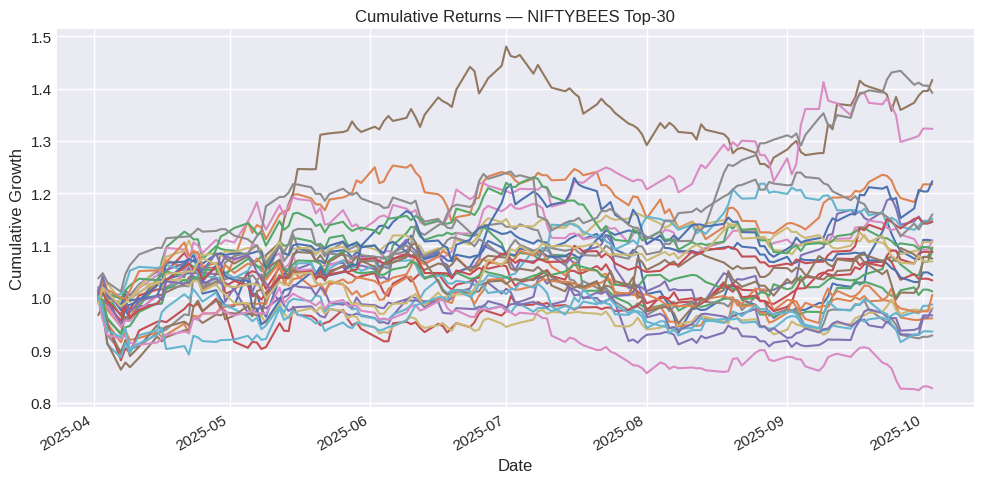

In [10]:
# ----- c) Daily returns -----
returns = adj.pct_change(fill_method=None).dropna(how='all').dropna(axis=1, how='all')
print("Daily returns shape:", returns.shape)
print(returns.head(), "\n")
returns.to_csv("task4_outputs/daily_returns_top30.csv")

# ----- Plot 1: Cumulative Returns -----
plt.figure(figsize=(10,5))
(1 + returns.fillna(0)).cumprod().plot(ax=plt.gca(), legend=False)
plt.title("Cumulative Returns — NIFTYBEES Top-30")
plt.ylabel("Cumulative Growth")
plt.tight_layout()
plt.savefig("task4_outputs/cumulative_returns.png")
plt.show()

Covariance matrix (first 5x5):
 Ticker         ADANIENT.NS  ADANIPORTS.NS  AXISBANK.NS  BAJAJFINSV.NS  \
Ticker                                                                  
ADANIENT.NS       0.000388       0.000241     0.000150       0.000141   
ADANIPORTS.NS     0.000241       0.000259     0.000101       0.000114   
AXISBANK.NS       0.000150       0.000101     0.000196       0.000092   
BAJAJFINSV.NS     0.000141       0.000114     0.000092       0.000190   
BAJFINANCE.NS     0.000143       0.000106     0.000092       0.000171   

Ticker         BAJFINANCE.NS  
Ticker                        
ADANIENT.NS         0.000143  
ADANIPORTS.NS       0.000106  
AXISBANK.NS         0.000092  
BAJAJFINSV.NS       0.000171  
BAJFINANCE.NS       0.000264   



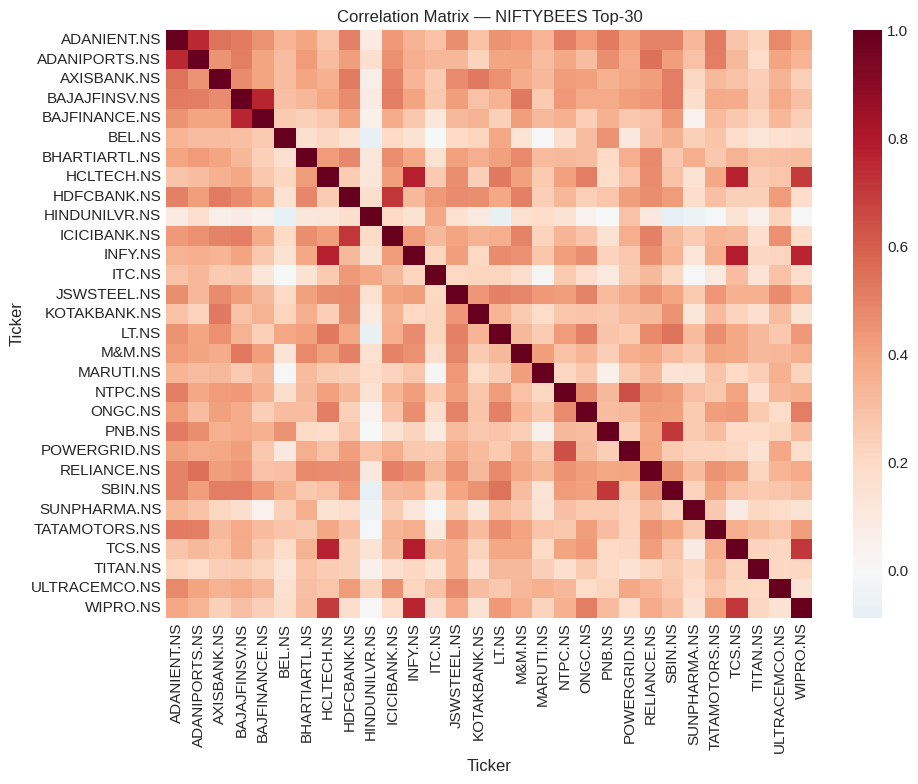

In [11]:
# ----- d) Covariance and Correlation -----
cov = returns.cov()
print("Covariance matrix (first 5x5):\n", cov.iloc[:5, :5], "\n")
cov.to_csv("task4_outputs/cov_matrix.csv")

plt.figure(figsize=(10,8))
sns.heatmap(returns.corr(), cmap="RdBu_r", center=0)
plt.title("Correlation Matrix — NIFTYBEES Top-30")
plt.tight_layout()
plt.savefig("task4_outputs/correlation_heatmap.png")
plt.show()

PCA Explained Variance Ratios (Top 10):
 [0.3767 0.0836 0.0626 0.0464 0.0447 0.0417 0.032  0.03   0.0266 0.0255] 



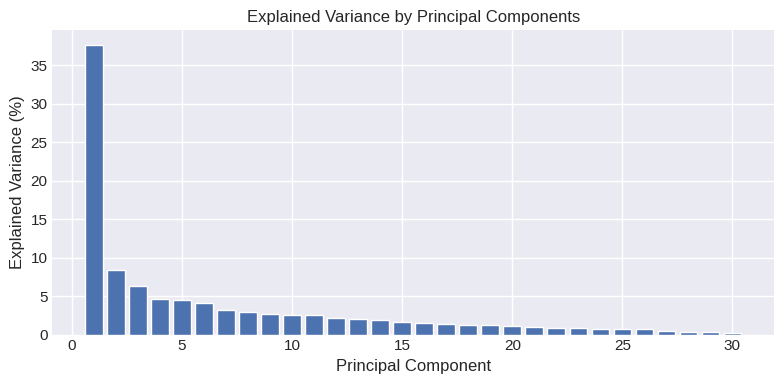

PCA Score Matrix (first 5 rows):
                  PC1       PC2       PC3
Date                                    
2025-04-02  0.017720  0.007577 -0.016597
2025-04-03 -0.023295 -0.075850 -0.013738
2025-04-04 -0.127337 -0.027782 -0.056196
2025-04-07 -0.175756  0.010579  0.006895
2025-04-08  0.100515 -0.004931  0.014212 



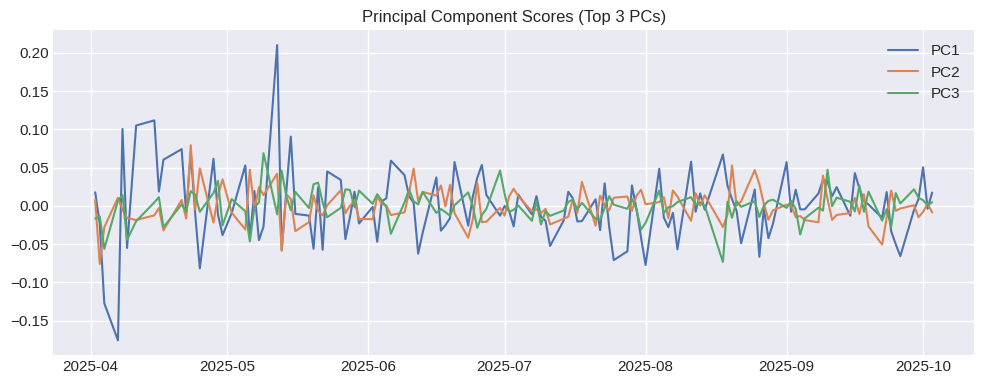

In [12]:
# ----- e) PCA -----
X = returns.fillna(0).values
pca = PCA()
pca.fit(X)

explained_var_ratio = pca.explained_variance_ratio_
components = pd.DataFrame(pca.components_, columns=returns.columns, index=[f"PC{i+1}" for i in range(len(returns.columns))])
print("PCA Explained Variance Ratios (Top 10):\n", np.round(explained_var_ratio[:10],4), "\n")

# Plot 2: PCA Explained Variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio*100)
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.tight_layout()
plt.savefig("task4_outputs/pca_explained_variance.png")
plt.show()

pc_scores = pca.transform(X)
pcs_df = pd.DataFrame(pc_scores[:, :3], index=returns.index, columns=["PC1","PC2","PC3"])
print("PCA Score Matrix (first 5 rows):\n", pcs_df.head(), "\n")
pcs_df.to_csv("task4_outputs/pcs_time_series.csv")

# Plot 3: PCA Time Series
plt.figure(figsize=(10,4))
for i in range(3):
    plt.plot(pcs_df.index, pcs_df.iloc[:,i], label=f"PC{i+1}")
plt.title("Principal Component Scores (Top 3 PCs)")
plt.legend()
plt.tight_layout()
plt.savefig("task4_outputs/pcs_time_series.png")
plt.show()

In [14]:
# ----- f) SVD -----
Xc = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(Xc, full_matrices=False)
print("Top 8 Singular Values:\n", np.round(s[:8],4), "\n")
print("First 5 Components from V^T:\n", np.round(Vt[:5,:5],4), "\n")

svd_df = pd.DataFrame({"singular_value": s, "eig_from_svd": (s**2)/(Xc.shape[0]-1)}, index=[f"Comp{i+1}" for i in range(len(s))])
svd_df.to_csv("task4_outputs/svd_results.csv")

Top 8 Singular Values:
 [0.5343 0.2517 0.2178 0.1875 0.184  0.1777 0.1558 0.1507] 

First 5 Components from V^T:
 [[-0.3227 -0.2407 -0.1969 -0.2048 -0.2003]
 [-0.3173 -0.2036 -0.1221 -0.1052 -0.1853]
 [ 0.0369  0.025  -0.0838 -0.1117 -0.1448]
 [-0.1719 -0.1227  0.0839  0.3458  0.5252]
 [ 0.3512  0.4088 -0.2434  0.1019  0.124 ]] 



In [15]:
# ----- g) Summary -----
summary = {
    "n_assets": returns.shape[1],
    "n_obs": returns.shape[0],
    "pc1_expl_var": float(explained_var_ratio[0]),
    "total_var_explained_5PCs": float(explained_var_ratio[:5].sum())
}
pd.Series(summary).to_csv("task4_outputs/summary.csv")
print("All outputs printed and saved under ./task4_outputs/")

All outputs printed and saved under ./task4_outputs/
